# Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project investigates a dataset that contains information collected from 100k medical appointments in Brazil obatined from kaggle, and is focused on the question of whether or not patients show up for their appointment or not. The dataset contains characteristics about the patient such as **scheduled day**, **neigbhourhood**, **scholarship** and so on. Stated below are the set of questions this project answers;

**Question 1**
<br>What is the relationship between the age category patients belongs to and missing appointments?
<br>**Question 2**
<br>Is the attendance of patients with Hypertension and Diabetes associated with missing appointments?
<br>**Question 3**
<br>Does the granting of scholarship significantly affect the attendance of patients?

<a id='wrangling'></a>
## Data Wrangling
In this section of the report,the data will be loaded, checked for cleanliness, and then trimmed and prepared for analysis.

### General Properties

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.shape

(110527, 14)

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Problem One
The date columns('ScheduledDay' and 'AppointmentDay') are in string format. These columns would be changed to date format

### Problem Two
The columns('Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received') are in integer data type. These columns would be changed to boolean, for ease of analysis.

### Problem Three
The 'No-show' column represents patients that showed up for appointment as 'No' and patients that did not show up as 'Yes'. So a new column named 'showed_up' would be created that represents 'No' as 'True'(Patient showed up for appointment) and 'Yes' would be represented as 'False'(Patient did not show up for appointment) and the column 'No-show' would be dropped.

### Problem Four
Some columns are misspelt ('Hipertension', 'Handcap'). These would be corrected. The column 'Patientid' would be changed to patientID for uniformity with the AppointmentID column. Also the 'Scholarship' column would be renamed to 'Sponsorship'for better understanding since the column tells us if a patient is sponsored by the Bolsa Family or not

### Data Cleaning

In [8]:
#fixing problem one
df['ScheduledDay']=df['ScheduledDay'].astype('datetime64[ns]')
df['AppointmentDay']=df['AppointmentDay'].astype('datetime64[ns]')
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [9]:
#fixing problem two
to_bool = ['Scholarship','Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

for c in to_bool:
    df[c] = df[c].astype('bool')

In [10]:
#Fixing problem Three
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [11]:
df['Showed_up'] = df['No-show'].apply(lambda x: 'True'if x == 'No' else 'False')
df['Showed_up'].value_counts()

True     88208
False    22319
Name: Showed_up, dtype: int64

In [12]:
#dropping the old 'No-show' column
df.drop("No-show",axis=1, inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True


In [13]:
#fixing problem four
#renaming Handcap column and Hipertension columnb
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'Handcap':'Handicap'}, inplace=True)
df.rename(columns={'PatientId':'PatientID'}, inplace=True)
df.rename(columns={'Scholarship':'Sponsorship'}, inplace=True)

In [14]:
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True


In [15]:
# Creating the Age-Groups column using pandas cut
#Age Groups;
#Children (00-14 years)
#Youth (15-24 years)
#Adults (25-64 years)
#Seniors (65 years and over)

df[df['Age']== -1]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,False,False,True


In [16]:
#drop the row with -1 age
df.drop(99832, axis=0, inplace=True)

In [17]:
#creating age group column

df['Age_Group']=pd.cut(x=df['Age'], bins=[0, 14, 24, 64, 115], labels=['children', 'Youth', 'Adults', 'Seniors'])
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Age_Group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,Adults
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,Adults
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,Adults
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,children
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,Adults


## Duplicates

Let us investigate our dataset to know if there are duplicate rows

In [18]:
sum(df.duplicated())

0

In [19]:
df.dtypes

PatientID                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Sponsorship                 bool
Hypertension                bool
Diabetes                    bool
Alcoholism                  bool
Handicap                    bool
SMS_received                bool
Showed_up                 object
Age_Group               category
dtype: object

In [20]:
# After creating the new Age Group column, and looking at the data set again, we noticed that the new column contained null data,
# and after investigating we realized patients with Age zero are not represented in the data and since Zero is an important data
# (zero can mean new born babies) null values in the Age_Group column was replaced with children.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientID       110526 non-null  float64       
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Sponsorship     110526 non-null  bool          
 8   Hypertension    110526 non-null  bool          
 9   Diabetes        110526 non-null  bool          
 10  Alcoholism      110526 non-null  bool          
 11  Handicap        110526 non-null  bool          
 12  SMS_received    110526 non-null  bool          
 13  Showed_up       110526 non-null  object        
 14  Age_Group       106987 non-null  cat

In [21]:
#Viewing the null values in the age group column
df[df['Age_Group'].isnull()]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Age_Group
59,7.184428e+13,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,False,False,False,False,False,False,True,NaN
63,2.366233e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,False,False,False,False,False,False,True,NaN
64,1.885174e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,False,False,False,False,False,True,True,NaN
65,2.718818e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,False,False,False,False,False,False,True,NaN
67,8.647128e+13,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,False,False,False,False,False,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58,2016-06-01,0,RESISTÊNCIA,False,False,False,False,False,False,True,NaN
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34,2016-06-08,0,RESISTÊNCIA,False,False,False,False,False,False,True,NaN
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44,2016-06-03,0,RESISTÊNCIA,False,False,False,False,False,False,True,NaN
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51,2016-06-03,0,RESISTÊNCIA,False,False,False,False,False,False,True,NaN


In [22]:
#We can see below that the number of null values in the age group column is equal to the number of Zero's in the Age column
df['Age_Group'].isna().sum()==df[df['Age']== 0]['Age'].count()

True

In [23]:
#replacing the null values with children, since 0 falls under the children category
df['Age_Group'].fillna('children', inplace=True)
df['Age_Group'].value_counts()

Adults      58857
children    23257
Seniors     14402
Youth       14010
Name: Age_Group, dtype: int64

In [24]:
#checking to see if there are still null values
df[df['Age_Group'].isnull()]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Sponsorship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Age_Group


<a id='eda'></a>
## Exploratory Data Analysis

We have now cleaned our dataset. Column names wrongly missplet have been corrected, data type issues have been fixed, columns have been reshaped to suit our analysis and we have confirmed that the dataset contains no duplicated rows. It is now time for Exploration.

## What is the relationship between age category patients belongs to and missing appointments?

<AxesSubplot:title={'center':'Patients Appointments'}, ylabel='Showed_up'>

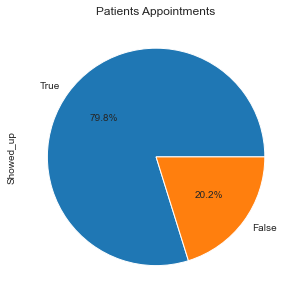

In [25]:
#First, we are going to determine what percentage of patients missed and did not miss their appointments

df['Showed_up'].value_counts().plot(kind='pie', title='Patients Appointments', autopct='%1.1f%%', figsize=[5,5])

From the chart above, we can see that 20.2% of the scheduled appointment were not attended by patients. We are going to investigate futher to see how age group contributes to the 20.2% of missed appointments

In [26]:
#Now we split the data into two sets and get the total number of patients that missed their appointments

Did_Not_Miss_Appointments = df[df['Showed_up']=='True']
Missed_Appointments = df[df['Showed_up']=='False']
Missed_Appointments['PatientID'].count()

22319

In [27]:
#Now we check the Age category distribution of the Missed Appointments
Age_category_missed = Missed_Appointments['Age_Group'].value_counts()
Age_category_missed

Adults      11620
children     4926
Youth        3540
Seniors      2233
Name: Age_Group, dtype: int64

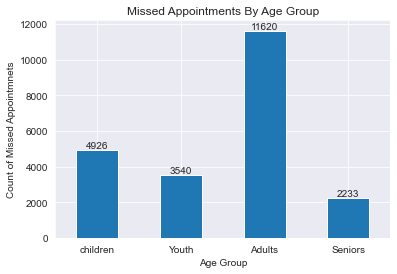

In [29]:
#Plotting a bar chart to show us the Age category distribution of the Missed Appointments
age_order = ['children', 'Youth', 'Adults', 'Seniors']

plot = Age_category_missed.reindex(age_order).plot(kind='bar', title='Missed Appointments By Age Group', rot=0)
plt.xlabel('Age Group')
plt.ylabel('Count of Missed Appointmnets')

#plot bar data is in array called patches, loop over it to access each bar
for bars in plot.patches:
    plt.text(bars.get_x() + bars.get_width()/2, bars.get_height(), bars.get_height(),
    ha='center', va='bottom');


<AxesSubplot:title={'center':'Missed Appointments By Age Group'}, ylabel='Age_Group'>

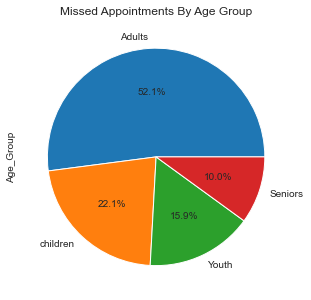

In [31]:
#Constructing A pie chart to show us the Age category distribution of the Missed Appointments by percentage
Age_category_missed.plot(kind='pie', title='Missed Appointments By Age Group', autopct='%1.1f%%', figsize=[5,5])

From the bar chart and pie chart above, we can see that the age group that contributed the most to the 20.2% missed appointments is the Adults age group (24-64 years) having a total of 52.1% missed appointments, followed by children 22.1% missed appointments, then youths having 15.9% missed appointments and finally seniors having a total of 10% missed appointments.

## Is the attendance of patients with Hypertension and Diabetes associated with missing appointments?

In [32]:
# To answer the question above, we have to understand how many patients with hypertension and diabetes missed their appointments
# and how many patients with hypertension and diabetes did not miss their appointments

df.groupby('Hypertension')['Showed_up'].value_counts()

Hypertension  Showed_up
False         True         70178
              False        18547
True          True         18029
              False         3772
Name: Showed_up, dtype: int64

In [33]:
#Patients with  and without hypertension that showed up for appointment(True) and did not show up for appointment(False)
hy_show = df.groupby('Hypertension')['Showed_up'].value_counts().unstack('Showed_up')
hy_show

Showed_up,False,True
Hypertension,,
False,18547,70178
True,3772,18029


In [34]:
#Patients with and without diabetes that showed up(True) for appointment and did not show up for appointment(False and )
di_show = df.groupby('Diabetes')['Showed_up'].value_counts().unstack('Showed_up')
di_show

Showed_up,False,True
Diabetes,,
False,20889,81694
True,1430,6513


In [35]:
#Removing only patients that has hypertension
hy_true = hy_show.loc[True].rename('Hypertension').to_frame()
hy_true

,Hypertension
Showed_up,
False,3772
True,18029


In [36]:
#Removing only patients that has diabetes
di_true = di_show.loc[True].rename('Diabetes').to_frame()

#joining only patients that has diabetes and hypertension
both_true = di_true.join(hy_true)
both_true

,Diabetes,Hypertension
Showed_up,,
False,1430,3772
True,6513,18029


<AxesSubplot:title={'center':'Patients with Diabetes and Hypertension That Showed up vs did not show up'}, xlabel='Showed_up'>

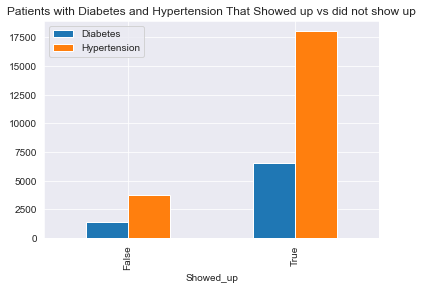

In [37]:
#Plotting a bar chart to show us the  number of patients that has diabetes and how many showed up(True) 
#vs did not show up(False)
both_true.plot(kind='bar', title='Patients with Diabetes and Hypertension That Showed up vs did not show up')

From the bar chart above we can see that patients with Hypertension and Diabetes have a greater attendance to the scheduled meetings with a value of 18029 that showed up for Hypertension and 6513 showed up for Diabetes

In [38]:
# Now we want to know what percentage of patients with hypertension and diabetes that miss and did not miss their appointment

# Percentage of Patients with and without hypertension that showed up for appointment(True) 
# and did not show up for appointment(False)
hy_show = df.groupby('Hypertension')['Showed_up'].value_counts(normalize=True).mul(100).unstack('Showed_up')
hy_show

Showed_up,False,True
Hypertension,,
False,20.903917,79.096083
True,17.301959,82.698041


In [39]:
# Percentage of Patients with and without diabetes that showed up for appointment(True) 
# and did not show up for appointment(False)
di_show = df.groupby('Diabetes')['Showed_up'].value_counts(normalize=True).mul(100).unstack('Showed_up')
di_show

Showed_up,False,True
Diabetes,,
False,20.363023,79.636977
True,18.003273,81.996727


In [40]:
#Showing only the percentage of people with hypertension that showed up and did not show up
hy_true = hy_show.loc[True].rename('Hypertension').to_frame()
hy_true

,Hypertension
Showed_up,
False,17.301959
True,82.698041


In [41]:
#Showing only the percentage of people with diabetes that showed up and did not show up
di_true = di_show.loc[True].rename('Diabetes').to_frame()
di_true

,Diabetes
Showed_up,
False,18.003273
True,81.996727


In [42]:
#joining only the percentage patients that has diabetes and hypertension
both_true = di_true.join(hy_true)
both_true

,Diabetes,Hypertension
Showed_up,,
False,18.003273,17.301959
True,81.996727,82.698041


Text(0.5, 1.0, 'Percentage of patients with diabetes and hypertension that showed up vs did not show up for appointment')

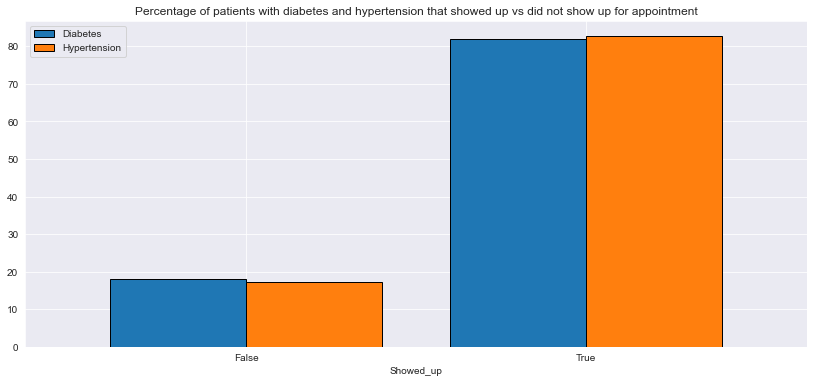

In [43]:
both_true.plot.bar(edgecolor='black', figsize=[14,6], rot=0, width=0.8)
plt.title('Percentage of patients with diabetes and hypertension that showed up vs did not show up for appointment')

From the bar chart above we can see that out of all the patients with Hypertension and Diabetes, a greater percentage of 83% out of 100% patients with hypertension showed up for their scheduled meetings, while 81% out of 100% of patients with diabetes showed up for their scheduled meetings

In [44]:
#Creating a function to plot a pie chart
def mypieplot(df, xvar, labels=["without", "with"]):
    '''
    inputs : df, xvar, labels. xvar is a placeholder and arguments with = are optional
    output: plots a pie cahrt
    '''
    
    #Plot the pie chart
    #Unstack, with subplots=True and autopct(to plot percentage(the .2 is the number of significant decimal places))
    plot = df.groupby(xvar)['Showed_up'].value_counts().unstack().T.plot(kind='pie', subplots=True, figsize=(14,6),
                                                                    explode=[0,0.1], autopct='%1.2f%%');
    
    #set Titles of the pie chart
    plot[0].set_title(f"{labels[0]} {xvar}", fontsize=14, weight='bold')
    plot[1].set_title(f"{labels[1]} {xvar}", fontsize=14, weight='bold')

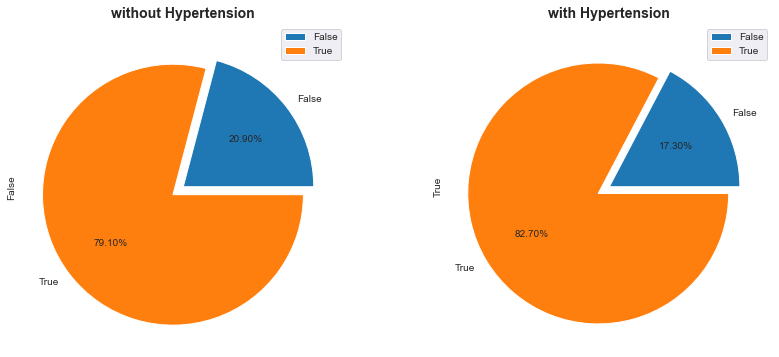

In [45]:
#Creating a pie chart containing patients with hypertension and diabetes that showed up(True) vs patients that did not show
# up(False)
mypieplot(df,'Hypertension')

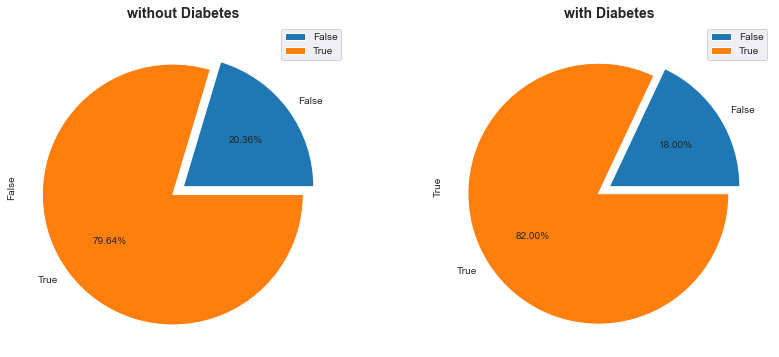

In [46]:
mypieplot(df,'Diabetes')

From the pie chart above we can see that out of all the patients with Hypertension and Diabetes, a greater percentage of 83% out of 100% patients with hypertension showed up for their scheduled meetings, while 82% out of 100% of patients with diabetes showed up for their scheduled meetings

<Figure size 360x360 with 0 Axes>

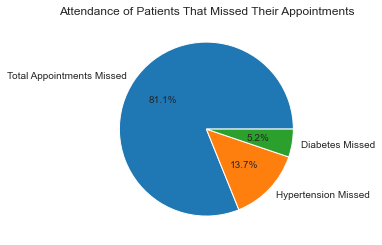

<Figure size 360x360 with 0 Axes>

In [47]:
# Calculating the percentage of patients with diabetes and hypertension that make up the percentage of appointments missed
Total_Missed_Appointment = Missed_Appointments['PatientID'].count()
Hypertension_Missed = 3772
Diabetes_Missed = 1430

list_missed_appointments = [Total_Missed_Appointment,Hypertension_Missed,Diabetes_Missed]
labels = ['Total Appointments Missed', 'Hypertension Missed', 'Diabetes Missed']

plt.title('Attendance of Patients That Missed Their Appointments')
plt.pie(list_missed_appointments, labels=labels,autopct='%1.1f%%')
plt.figure(figsize=[5,5])

From the chart above we can see that patients with hypertension and diabetes contributed only a total of 18.9% to the total appointments missed, which is not significant enough

## Does the granting of scholarship significantly affect the attendance of patients?

<AxesSubplot:title={'center':'Proportion of patients receiving SMS'}, ylabel='Sponsorship'>

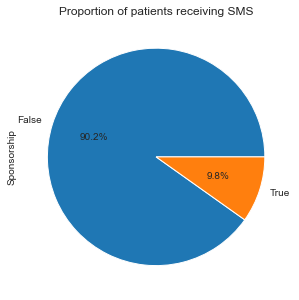

In [48]:
#First we determine what proportion of patients received Scholarship
df['Sponsorship'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Proportion of patients receiving SMS', figsize=[5,5])

Now we know that 9.8% of patients were sponsored by the Bolsa Family. The next step is to determine how many percentage out of the 9.8% that were sponsored showed up for their appointment. This will help us answer the question posed.

In [49]:
#Filtered the dataset to show only the number of patients that receive and did not receive sponsorhip by Bolsa family and their 
#attendance
df[['Showed_up','Sponsorship']].value_counts()

Showed_up  Sponsorship
True       False          79924
False      False          19741
True       True            8283
False      True            2578
dtype: int64

In [50]:
#created a dataframe to clearly represent the information above
Sponsored =[8283, 2578]
Not_Sponsored =[79924, 19741]

df1={"Bolsa":['Sponsored', 'Not_Sponsored'], "Showed_up": [8283,79924], "Did_not_show_up":[2578, 19741]}

df2 = pd.DataFrame(df1)
df2

,Bolsa,Showed_up,Did_not_show_up
0,Sponsored,8283,2578
1,Not_Sponsored,79924,19741


<Figure size 360x360 with 0 Axes>

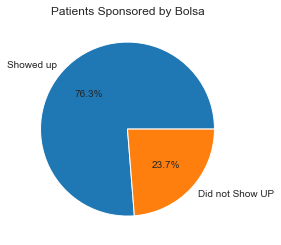

<Figure size 360x360 with 0 Axes>

In [51]:
attendance_sponsored = [8283, 2578]
labels = ['Showed up', 'Did not Show UP']

plt.title('Patients Sponsored by Bolsa')
plt.pie(attendance_sponsored, labels=labels,autopct='%1.1f%%')
plt.figure(figsize=[5,5])



We can see finally that 76.3% of the patients sponsored by the bolsa family attended their scheduled appointments

<a id='conclusions'></a>
## Conclusions
<br> Exploration has been done in this project for the purpose of answering the research questions. We can now see how certain factors affect the probability of patients missing their appointments. The fiindings of this project is enumerated below

 ## What is the relationship between age category patients belongs to and missing appointments?
 
From the analysis we can see that 22,319(20.2%) appointments out of the total of 110,526 Scheduled appointments were missed, and analysing the total appointments missed(20.2%) by age group, the number of scheduled appointments missed by the adult group is 11,620 appointments (52.0%), children group  has a total of 4926 appointments (22.1%) missed appointments, youth group has a total of 3540 appointments (15.90%) missed appointments and finally seniors has a total of 2233(10%) missed appointments.
Thois tells us that the adult group (24-64 years) has the highest missed appointments.

## Is the attendance of patients with Hypertension and Diabetes associated with missing appointments?
<br> out of a total of 20.2% missed appointments, patients with Hypertension accounted for only 13.7% of the total appointments missed, while patients with diabetes accounted 5.2% of the missed scheduled appointments. Other features contribute asbout 81% of the total missed scheduled appointments. This leads us to conclude that Patients with Hypertension and Diabetes does not significantly contribute to the total scheduled appointments missed.

## Does the granting of scholarship significantly affect the attendance of patients?
<br> Though only 9.8% out of a total of 110526 appointments scheduled were covered by the Bolsa family, but an interesting discovery after going futher to analyse the 9.8% appointments covered by the Bolsa Family, is that 76.3% of the scheduled attended by the patients, while only 23.7% of Scheduled appointments were missed. This shows us that more appointments should be 
covered by various organizations, families and governments that offer medical sponsorship.

## NOTE
<br> Statistical tests were not performed in this project, only descriptive analytics. Also, though we found important relationships in our data, this does not mean that there are not other variables influencing the relationship. There may be a hidden variable that we don't know about influencing relationships in our data. For example, though we have a total appointments of over 100,000 there are only about 6000 patients. This research focuses on the number of scheduled appointments.